## Implementing ridge regression via gradient descent

In [1]:
import pandas as pd
import numpy as np

In [4]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('data/kc_house_data.csv', dtype=dtype_dict)
train = pd.read_csv('data/kc_house_train_data.csv', dtype=dtype_dict)
test = pd.read_csv('data/kc_house_test_data.csv', dtype=dtype_dict)

In [5]:
def get_numpy_data(data, features, output):
    data['constant'] = 1 # add a constant column 

    # prepend variable 'constant' to the features list
    features = ['constant'] + features

    # select the columns of data_SFrame given by the ‘features’ list into the SFrame ‘features_sframe’
    features_matrix=data[features].to_numpy()

    # assign the column of data_sframe associated with the target to the variable ‘output_sarray’
    output_array = data[output].to_numpy()

    return(features_matrix, output_array)

In [6]:
def predict_outcome(feature_matrix, weights):
    predictions = np.dot(feature_matrix,weights)
    return(predictions)

In [58]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size,l2_penalty, max_iter=500):
    converged = False
    weights = np.array(initial_weights)
    i = 0
    while i<max_iter:
        # compute the predictions based on feature_matrix and weights:
        prediction = predict_outcome(feature_matrix,weights)
        # compute the errors as predictions - output:
        error = np.array(prediction-output)
        # while not converged, update each weight individually:
        partial=2*np.dot(feature_matrix.T,error)+2*l2_penalty*weights
        # update the weight based on step size and derivative:
        weights_new=weights-(step_size*partial)
        weights_new[0]=weights_new[0]-2*l2_penalty*weights[0]*step_size
        i+=1
        weights = weights_new
    return(weights_new,i)

In [26]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test, simple_features, my_output)

In [64]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.array([0., 0.])
simple_weights_0_penalty, i = regression_gradient_descent(simple_feature_matrix, train['price'], initial_weights,step_size,
                                         l2_penalty=0, max_iter=max_iterations)

In [65]:
simple_weights_0_penalty

array([-1.63113515e-01,  2.63024369e+02])

In [67]:
max_iterations = 1000
initial_weights = np.array([0., 0.])
simple_weights_high_penalty, i = regression_gradient_descent(simple_feature_matrix, train['price'], initial_weights,step_size,
                                         l2_penalty=1e+11, max_iter=max_iterations)

In [69]:
simple_weights_high_penalty

array([2.43592392e-02, 1.24574025e+02])

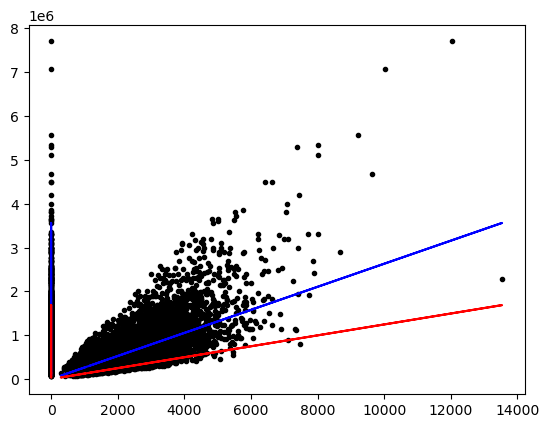

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [74]:
simple_features = ['sqft_living']
my_output = 'price'
test_matrix, out= get_numpy_data(test, simple_features , my_output)
RSS_test = np.sum((out-predict_outcome(test_matrix, initial_weights))**2)

In [75]:
RSS_test

1784273286136298.0

In [ ]:
RSS_test_0_penalty = np.sum((out-predict_outcome(test_matrix, simple_weights_0_penalty))**2)

In [77]:
RSS_test_0_penalty


275723632153607.44

In [78]:
RSS_test_high_penalty = np.sum((out-predict_outcome(test_matrix, simple_weights_high_penalty))**2)

In [79]:
RSS_test_high_penalty

694654340104150.8

In [84]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test, model_features, my_output)

In [85]:
initial_weights = [0.,0.,0.]
step_size = 1e-12
max_iterations = 1000

In [88]:
multiple_0_penalty_weights, i = regression_gradient_descent(feature_matrix, train['price'], initial_weights,step_size,
                                         l2_penalty=0, max_iter=max_iterations)

In [90]:
multiple_0_penalty_weights

array([ -0.35743483, 243.05416982,  22.41481497])

In [89]:
multiple_high_penalty_weights, i = regression_gradient_descent(feature_matrix, train['price'], initial_weights,step_size,
                                         l2_penalty=1e11, max_iter=max_iterations)

In [91]:
multiple_high_penalty_weights

array([1.68005834e-02, 9.14901698e+01, 7.84374926e+01])

In [ ]:
test_matrix, out= get_numpy_data(test, model_features , my_output)
RSS_test_0_penalty = np.sum((out-predict_outcome(test_matrix, multiple_0_penalty_weights))**2)

In [95]:
RSS_test_0_penalty

274067615918575.56

In [96]:
RSS_test_high_penalty = np.sum((out-predict_outcome(test_matrix, multiple_high_penalty_weights))**2)

In [97]:
RSS_test_high_penalty

500408539540914.4

In [99]:
predict_outcome(test_matrix, multiple_0_penalty_weights)[0]

387465.47605823533

In [98]:
predict_outcome(test_matrix, multiple_high_penalty_weights)[0]

270449.6964653716

In [100]:
test['price'][0]

310000.0